# **import library**

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model ,Sequential
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D
from tensorflow.keras.layers import MaxPooling2D, concatenate, Dense, Flatten ,UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# *Read path of image*

In [2]:
# Set parameters
Size = (256, 256)
mask_files = glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
train_files = [file.replace('_mask', '') for file in mask_files]

**show 5 path of image**

In [3]:
mask_files[:5]

['../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_8_mask.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_34_mask.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33_mask.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_43_mask.tif']

**Show 5 path of mask**

In [4]:
train_files[:5]

['../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_8.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_34.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33.tif',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_43.tif']

**DataFrame of path iamge & mask & label**

In [5]:
def label(mask):
    value = np.max(cv2.imread(mask))
    return '1' if value > 0 else '0'
df = pd.DataFrame({"image": train_files,
                   "mask": mask_files,
                  "label":[label(x) for x in mask_files]})

**Show 5 row**

In [6]:
df.head()

image  \
0  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
1  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
4  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   

                                                mask label  
0  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...     0  
1  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...     0  
2  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...     1  
3  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...     1  
4  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...     1

**show Length of each class**

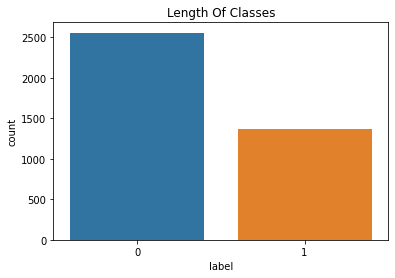

In [7]:
sns.countplot(data=df,x=df['label'])
plt.title('Length Of Classes')
plt.show()

**Take 5 row of each class**

In [8]:
df_Tumor = df[df['label']=='1'].sample(5).values
df_NotTumor = df[df['label']=='0'].sample(5).values

**Show row of Tumor**

In [9]:
df_Tumor[0]

array(['../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_16.tif',
       '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_16_mask.tif',
       '1'], dtype=object)

**Show row of Not Tumor**

In [10]:
df_NotTumor[0]

array(['../input/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_65.tif',
       '../input/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_65_mask.tif',
       '0'], dtype=object)

# **Show image and Mask of each Class**

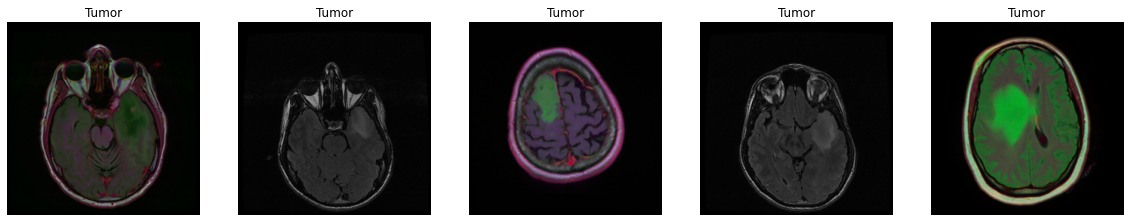

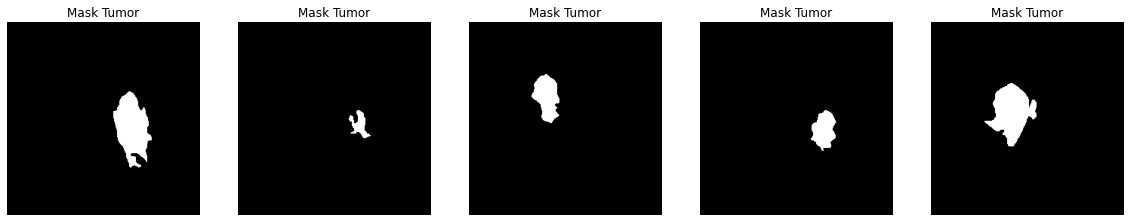

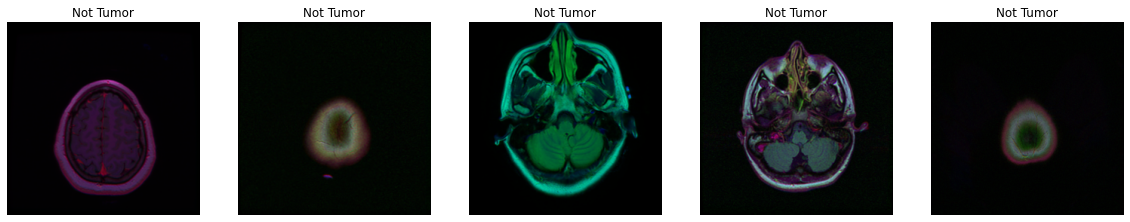

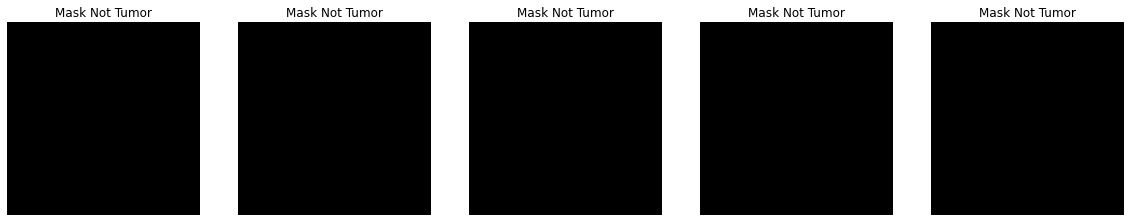

In [11]:
#showing training images with labels
plt.figure(figsize=(20,20))
plt.title('Tumor')
for n , i in enumerate(range(5)) : 
    plt.subplot(1,5,n+1)
    img=cv2.imread(df_Tumor[i,0])
    plt.title('Tumor')
    plt.imshow(img)
    plt.axis('off')
    #showing training images with labels
plt.show()
plt.figure(figsize=(20,20))
for n , i in enumerate(range(5)) :
    plt.subplot(1,5,n+1)
    plt.title('Mask Tumor')
    img=cv2.imread(df_Tumor[i,1])
    plt.imshow(img)
    
    plt.axis('off')
plt.show()

#showing training images with labels
plt.figure(figsize=(20,20))
plt.title('Tumor')
for n , i in enumerate(range(5)) : 
    plt.subplot(1,5,n+1)
    plt.title('Not Tumor')
    img=cv2.imread(df_NotTumor[i,0])
    plt.imshow(img)
    plt.axis('off')
    #showing training images with labels
plt.show()
plt.figure(figsize=(20,20))
for n , i in enumerate(range(5)) :
    plt.subplot(1,5,n+1)
    plt.title('Mask Not Tumor')
    img=cv2.imread(df_NotTumor[i,1])
    plt.imshow(img)
    
    plt.axis('off')
plt.show()

# **Split data train (0.9) valid (0.5) test (0.05)**

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.1)
df_test, df_val = train_test_split(df_test, test_size=0.5)
print(df_train.values.shape)
print(df_val.values.shape)
print(df_test.values.shape)

(3536, 3)
(197, 3)
(196, 3)


# **Funcrion To augmentation and Scalling**

In [13]:
def train_generator(data_frame, batch_size, aug_dict,
        image_color_mode="rgb",
        mask_color_mode="grayscale",
        image_save_prefix="image",
        mask_save_prefix="mask",
        save_to_dir=None,
        target_size=(256,256),
        seed=1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)
    
    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255.
    mask = mask / 255.
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)

# 1.0 **Segmentation Model**

# 1.1 **Unet architecture**

 <img src="http://tuatini.me/content/images/2017/09/u-net-architecture.png">

In [14]:
def unet(input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs= inputs, outputs = conv10)
    return model

In [15]:
m=unet()
m.summary()

2022-01-17 19:33:04.274708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 19:33:04.369348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 19:33:04.370091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 19:33:04.371196: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

<img src="https://storage.googleapis.com/kaggle-media/competitions/rsna/IoU.jpg">
<img src="https://d3i71xaburhd42.cloudfront.net/8575e8beef47bd2880c92f54a749f933db983e56/2-Table1-1.png">



In [16]:
smooth=1.

def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

# **Parameters Of Fitiing**

In [17]:
# Set parameters
EPOCHS = 100
BATCH_SIZE = 16
learning_rate = 1e-4

# 1.2 **Read Data and augmentation**

In [18]:
train_generator_args = dict(rotation_range=0.1,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest')
train_gen = train_generator(df_train, BATCH_SIZE,
                                train_generator_args,
                                target_size=Size)
    
val_gen = train_generator(df_val, BATCH_SIZE,
                                dict(),
                                target_size=Size)

# 1.3 **Create Model Unet**

In [19]:
model = unet(input_size=(Size[0], Size[1], 3))

**Optimization and CallBacks**

In [20]:
opt = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

callbacks = [ModelCheckpoint('brainMRI_Segment.hdf5', verbose=0, save_best_only=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-11),
            EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=15)]

**Compile model**

In [21]:
model.compile(optimizer=opt, loss=bce_dice_loss, metrics=[iou, dice_coef])

**Fitting Model**

In [22]:
history = model.fit(train_gen,
                    steps_per_epoch=len(df_train) // BATCH_SIZE, 
                    epochs=EPOCHS, 
                    callbacks=callbacks,
                    validation_data = val_gen,
                    validation_steps=len(df_val) // BATCH_SIZE)

Found 3536 validated image filenames.
Found 3536 validated image filenames.


2022-01-17 19:33:12.316613: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-01-17 19:33:14.909991: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


221/221 [==============================] - ETA: 0s - loss: 0.7196 - iou: 0.2420 - dice_coef: 0.3577Found 197 validated image filenames.
Found 197 validated image filenames.
221/221 [==============================] - 141s 568ms/step - loss: 0.7196 - iou: 0.2420 - dice_coef: 0.3577 - val_loss: 0.6247 - val_iou: 0.3167 - val_dice_coef: 0.4509
Epoch 2/100
221/221 [==============================] - 113s 512ms/step - loss: 0.4825 - iou: 0.4134 - dice_coef: 0.5652 - val_loss: 0.5133 - val_iou: 0.3938 - val_dice_coef: 0.5364
Epoch 3/100
221/221 [==============================] - 114s 514ms/step - loss: 0.3773 - iou: 0.5099 - dice_coef: 0.6580 - val_loss: 0.3349 - val_iou: 0.5495 - val_dice_coef: 0.7009
Epoch 4/100
221/221 [==============================] - 113s 513ms/step - loss: 0.3694 - iou: 0.5199 - dice_coef: 0.6652 - val_loss: 0.2793 - val_iou: 0.6069 - val_dice_coef: 0.7452
Epoch 5/100
221/221 [==============================] - 114s 516ms/step - loss: 0.3552 - iou: 0.5335 - dice_coef: 0.

# 1.4 **visualization Accuracy and Loss**

Text(0.5, 1.0, 'Dice Coef')

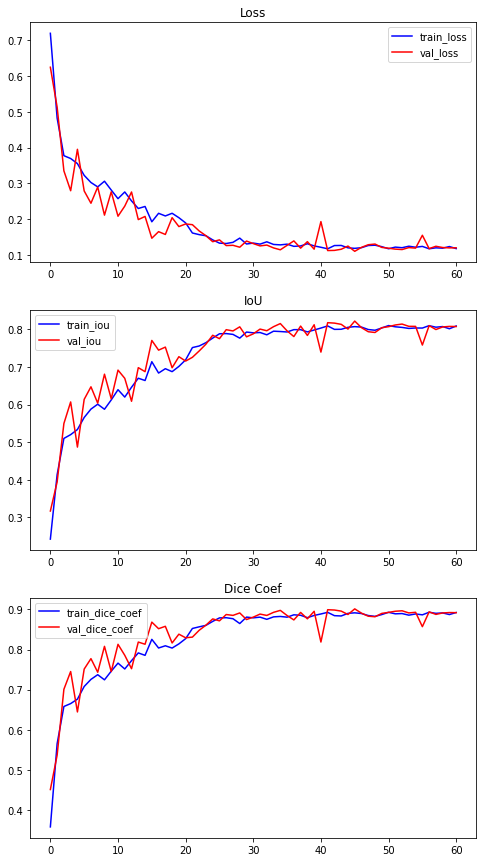

In [23]:
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.plot(model.history.history['loss'], 'b-', label='train_loss')
plt.plot(model.history.history['val_loss'], 'r-', label='val_loss')
plt.legend(loc='best')
plt.title('Loss')

plt.subplot(3,1,2)
plt.plot(model.history.history['iou'], 'b-', label='train_iou')
plt.plot(model.history.history['val_iou'], 'r-', label='val_iou')
plt.legend(loc='best')
plt.title('IoU')

plt.subplot(3,1,3)
plt.plot(model.history.history['dice_coef'], 'b-', label='train_dice_coef')
plt.plot(model.history.history['val_dice_coef'], 'r-', label='val_dice_coef')
plt.legend(loc='best')
plt.title('Dice Coef')

# 1.5 **Predction**

In [24]:
test_gen = train_generator(df_test, BATCH_SIZE,
                                dict(),
                                target_size=Size)
results = model.evaluate(test_gen, steps=len(df_test) / BATCH_SIZE)
print("Test IOU: ",results[1])
print("Test Dice Coefficent: ",results[2])

Found 196 validated image filenames.
Found 196 validated image filenames.
12/12 [==============================] - 4s 355ms/step - loss: 0.1321 - iou: 0.7945 - dice_coef: 0.8843
Test IOU:  0.7944555878639221
Test Dice Coefficent:  0.8843334913253784


**visualization The prediction**

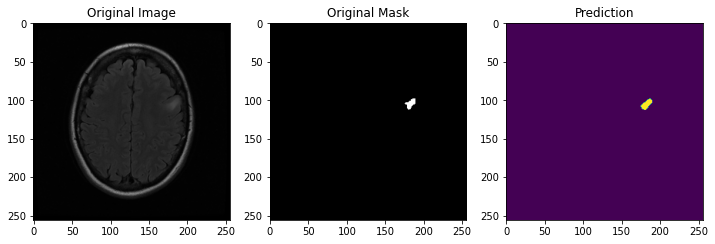

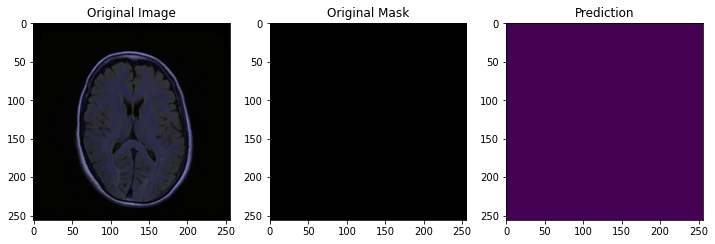

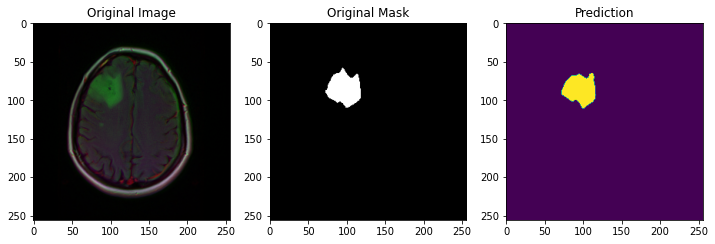

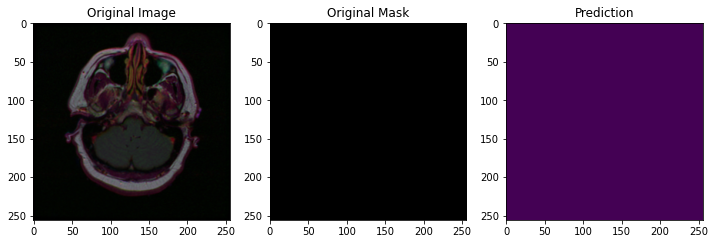

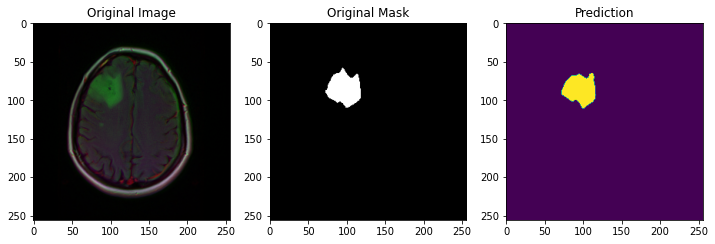

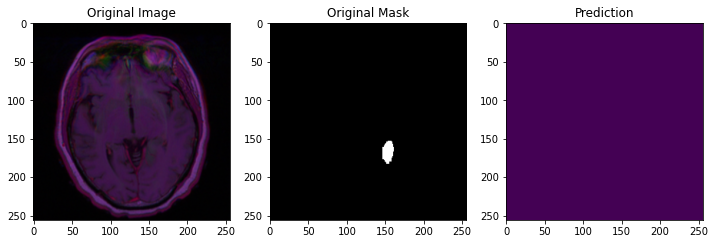

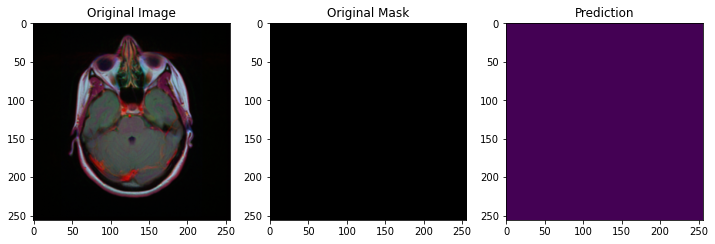

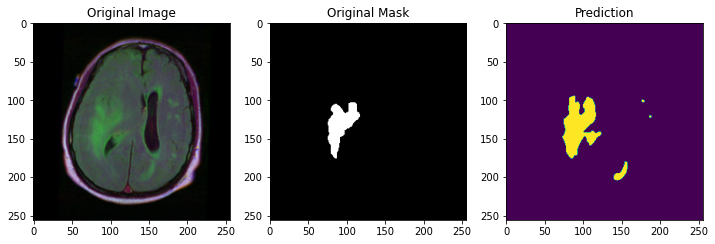

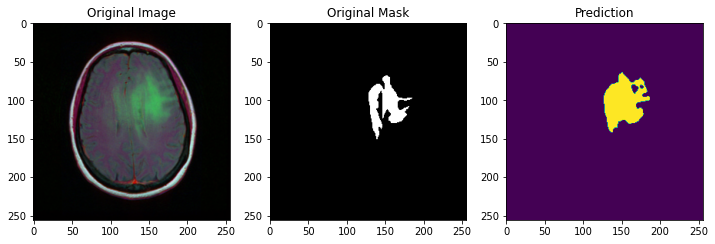

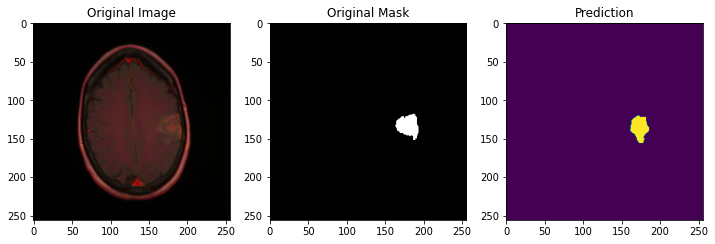

In [25]:
for i in range(10):
    index=np.random.randint(1,len(df_test.index))
    img = cv2.imread(df_test['image'].iloc[index])
    img = cv2.resize(img ,Size)
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(df_test['mask'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()

# 2.0 **Classification Model**

# 2.1 **Read Data and augmentation**

**Train Data**

In [26]:
Gen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255.,
            rotation_range=0.1,
            width_shift_range=0.05,
            height_shift_range=0.05,
            shear_range=0.05,
            zoom_range=0.05,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest'
)

In [27]:
len(df[df['label']=='1'])

1373

In [28]:
d1=np.array(df[df['label']=='0'].sample(1373).values)
d2=np.array(df[df['label']=='1'].sample(1373).values)

In [29]:
ddd=np.vstack([d1,d2])

In [30]:
df_train=pd.DataFrame(ddd,columns=['image','mask','label'])

In [31]:
df_train.shape

(2746, 3)

In [32]:
train= Gen.flow_from_dataframe(
            dataframe=df_train,
            x_col="image",
            y_col="label",
            has_ext=False,
            batch_size=16,
            seed=42,
            shuffle=True,
            color_mode='rgb',
            class_mode="binary",
            target_size=Size
)
print('Train generator created')

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/root/.local/lib/python3.7/site-packages/log.py", line 16, in format
    msg = super(_LogFormatter, self).format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_

Found 2746 validated image filenames belonging to 2 classes.
Train generator created


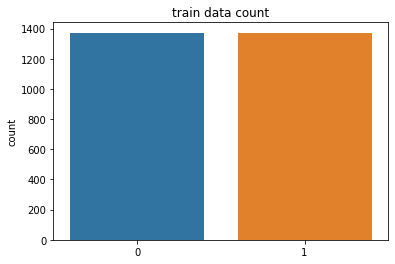

In [33]:
plt.title('train data count')
sns.countplot(train.classes)
plt.show()

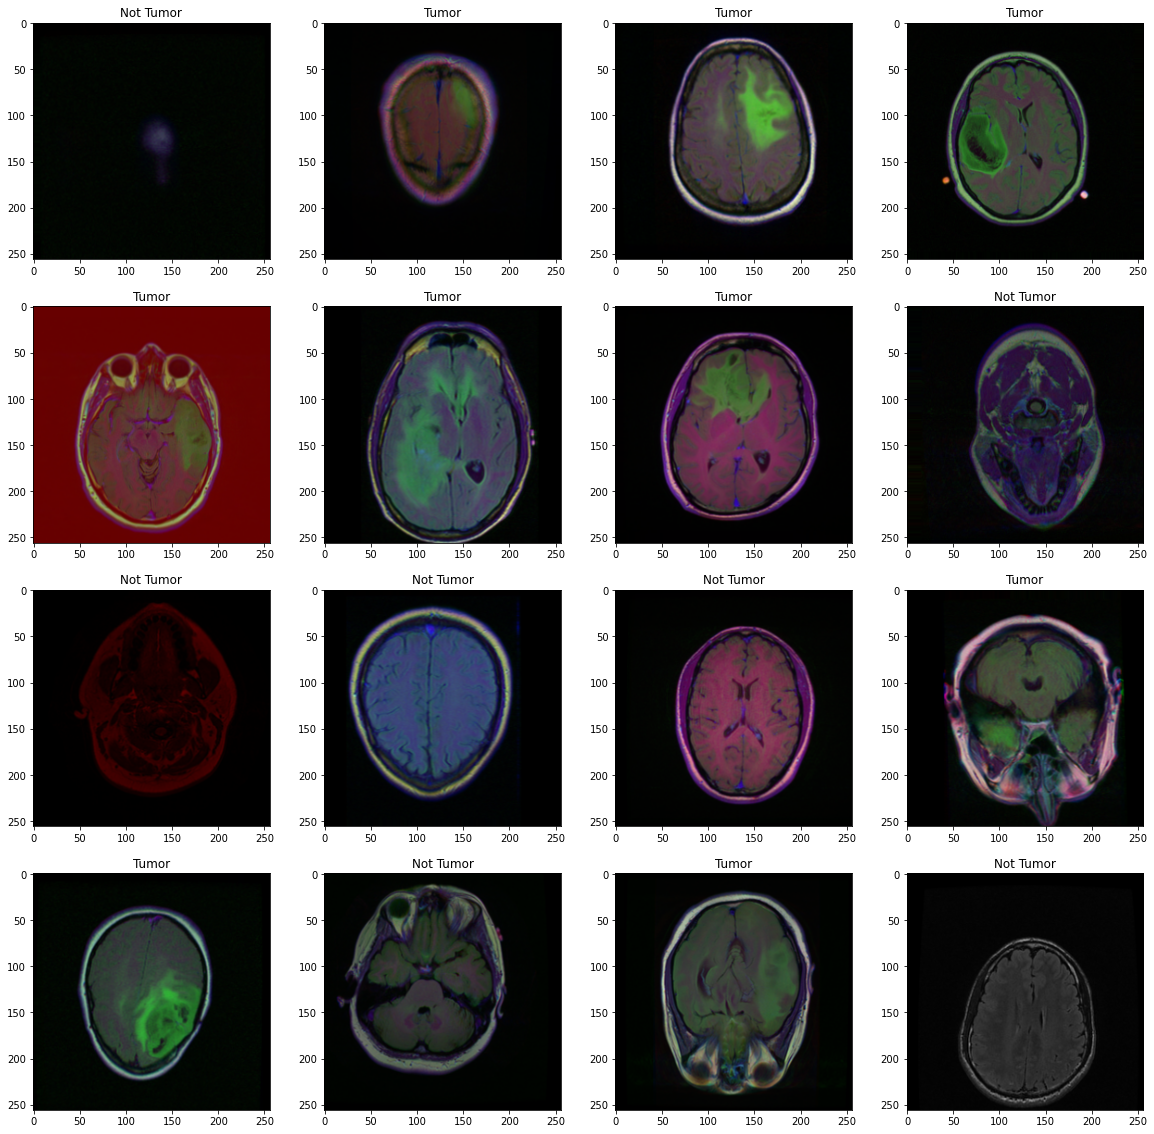

In [34]:
classes={0:'Not Tumor',1:'Tumor'}
plt.figure(figsize=(20,20))
for X_batch, y_batch in train:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[y_batch[i]])
    # show the plot
    plt.show()
    break

**Validation Data**

In [35]:
Genn = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255.,
            )
valid = Genn.flow_from_dataframe(
            dataframe=df_val,
            x_col="image",
            y_col="label",
            has_ext=False,
            batch_size=16,
            seed=42,
            shuffle=True,
            color_mode='rgb',#rgb 
            class_mode="binary",
            target_size=Size
)
print('Valid generator created')

Found 197 validated image filenames belonging to 2 classes.
Valid generator created


--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/root/.local/lib/python3.7/site-packages/log.py", line 16, in format
    msg = super(_LogFormatter, self).format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_

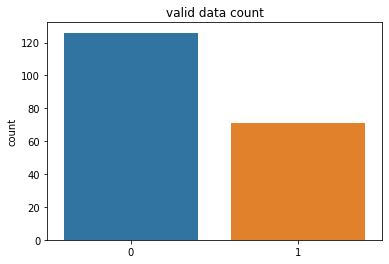

In [36]:
plt.title('valid data count')
sns.countplot(valid.classes)
plt.show()

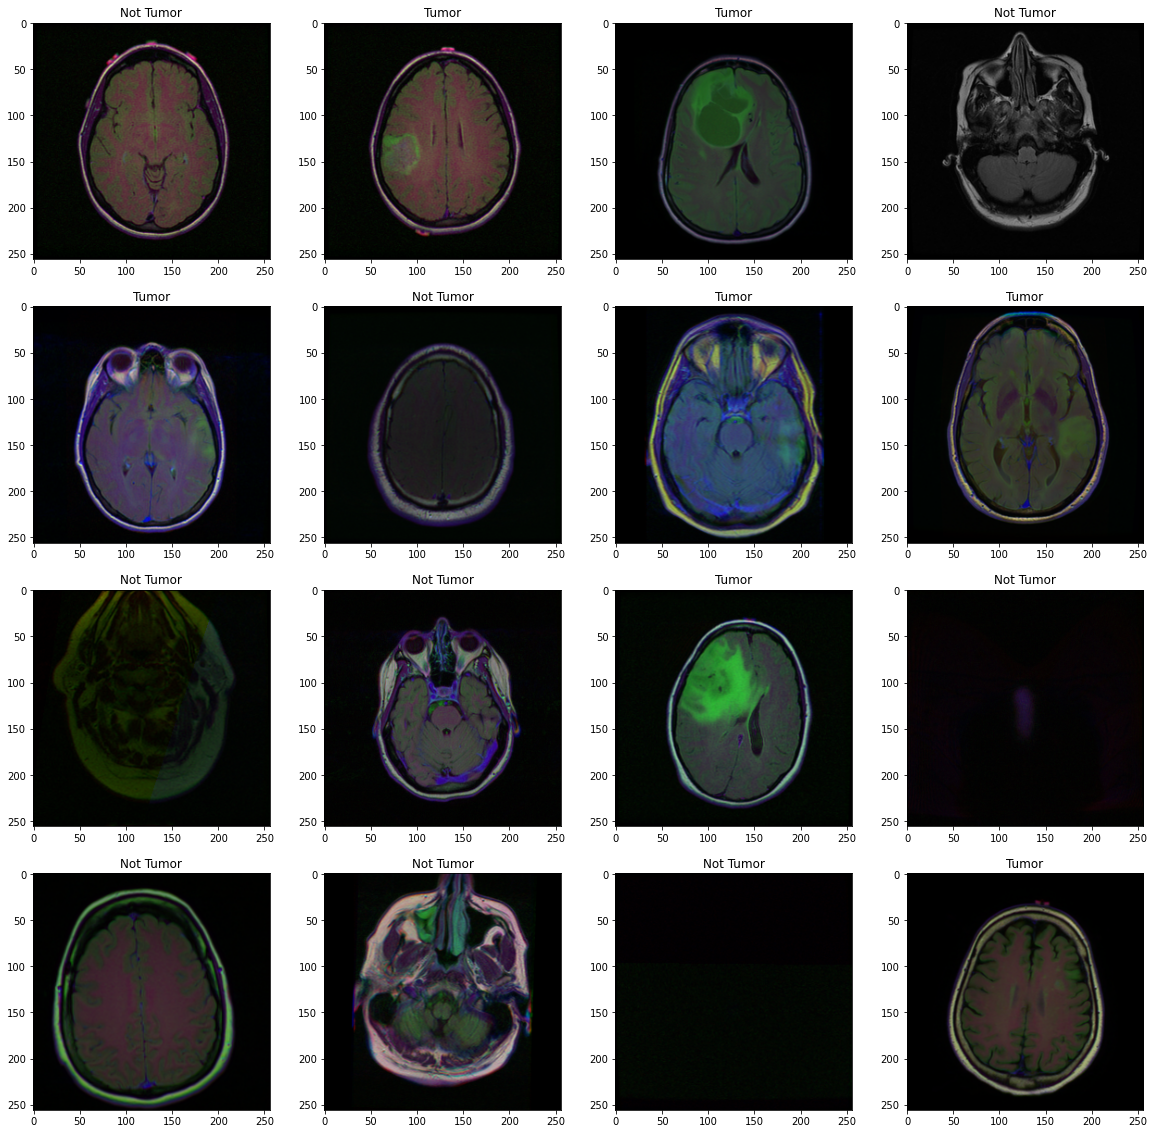

In [37]:
classes={0:'Not Tumor',1:'Tumor'}
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[y_batch[i]])
    # show the plot
    plt.show()
    break

**Test Data**

In [38]:
test = Genn.flow_from_dataframe(
            dataframe=df_test,
            x_col="image",
            y_col="label",
            has_ext=False,
            batch_size=16,
            seed=42,
            shuffle=True,
            color_mode='rgb',
            class_mode="binary",
            target_size=Size
)
print('test generator created')

Found 196 validated image filenames belonging to 2 classes.
test generator created


--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/root/.local/lib/python3.7/site-packages/log.py", line 16, in format
    msg = super(_LogFormatter, self).format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_

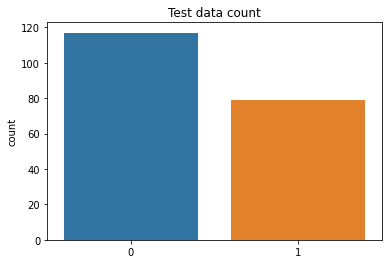

In [39]:
plt.title('Test data count')
sns.countplot(test.classes)
plt.show()

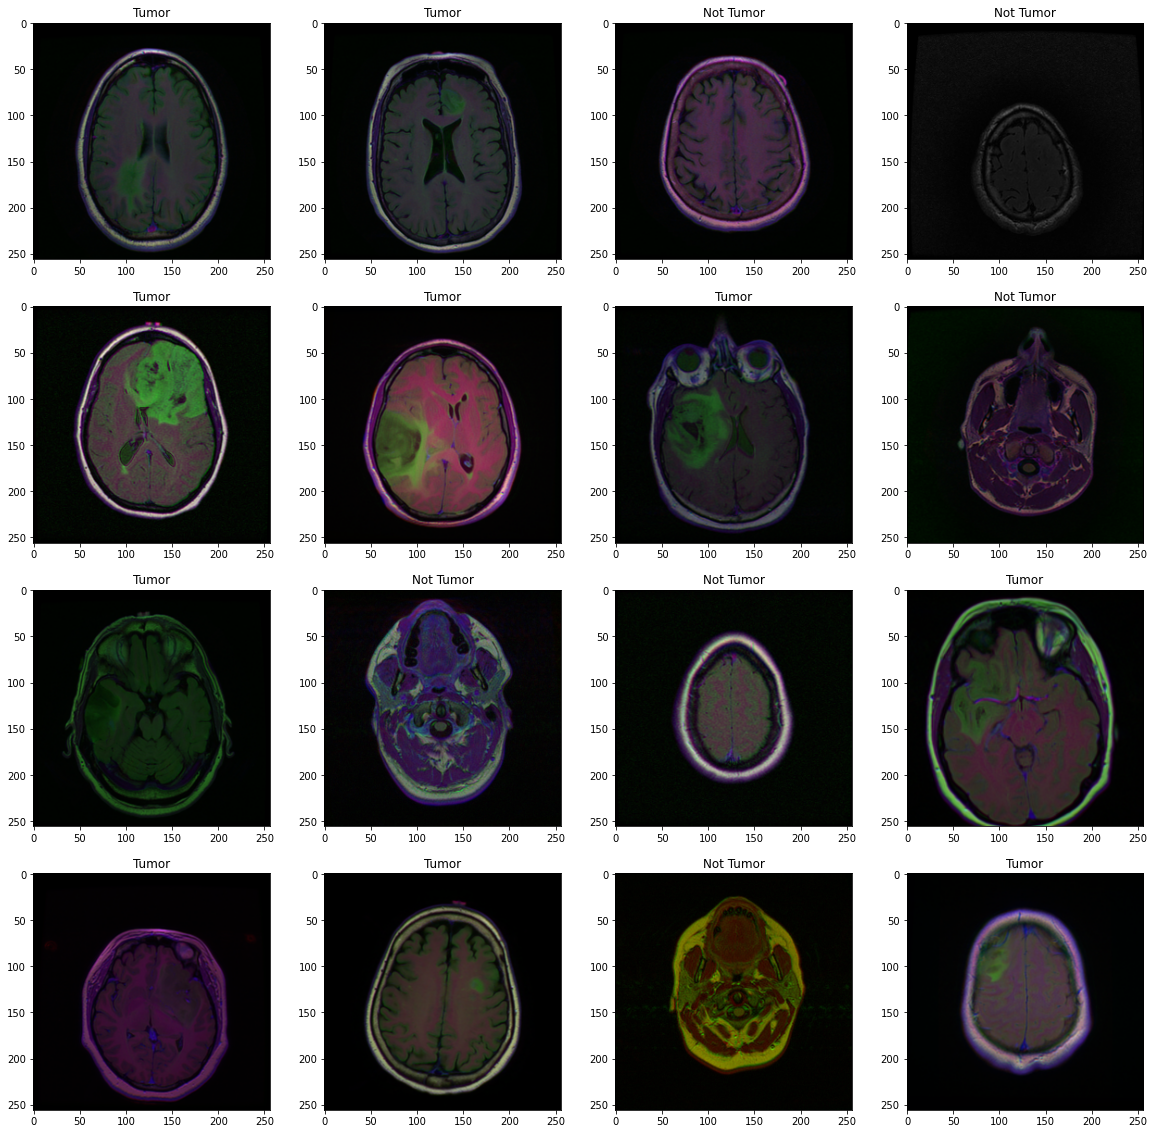

In [40]:
plt.figure(figsize=(20,20))
for X_batch, y_batch in test:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[y_batch[i]])
    # show the plot
    plt.show()
    break

# 2.2 **Build Model**

In [41]:
classifier=Sequential([
    
                Conv2D(64,3,activation='relu',input_shape=(256,256,3)),
                BatchNormalization(),              
                MaxPooling2D(3),
    
                Conv2D(128,3,activation='relu'),
                BatchNormalization(),
                MaxPooling2D(3),
    
                Conv2D(128,3,activation='relu'),
                BatchNormalization(),
                MaxPooling2D(3),

                Conv2D(256,3,padding='valid',activation='relu'),
                BatchNormalization(),
                MaxPooling2D(3),

                Flatten(),
    
                Dense(1024,activation='relu'),
                BatchNormalization(),
    
                Dense(256,activation='relu'),
                BatchNormalization(),
    
                Dense(1,activation='sigmoid')
                  
])

**Summary of model**

In [42]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 82, 82, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 82, 82, 128)       512       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 25, 25, 128)       1

**Callbacks**

In [43]:
callback = [ModelCheckpoint('brainMRI_Classifer.hdf5', verbose=1, save_best_only=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-11),
            EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=7)]

**Compile Model**

In [44]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

**Fitting Model**

In [45]:
history=classifier.fit(train,validation_data=valid,epochs=EPOCHS,batch_size=2,
                  steps_per_epoch=len(train),validation_steps=len(valid)//4,
                  callbacks=callback, verbose=1,shuffle=True)

Epoch 1/100
172/172 [==============================] - 40s 223ms/step - loss: 0.9450 - accuracy: 0.4625 - val_loss: 0.8742 - val_accuracy: 0.2917

Epoch 00001: val_loss improved from inf to 0.87422, saving model to brainMRI_Classifer.hdf5
Epoch 2/100
172/172 [==============================] - 42s 244ms/step - loss: 0.9357 - accuracy: 0.4829 - val_loss: 1.2222 - val_accuracy: 0.3958

Epoch 00002: val_loss did not improve from 0.87422
Epoch 3/100
172/172 [==============================] - 38s 223ms/step - loss: 0.9320 - accuracy: 0.4880 - val_loss: 0.9441 - val_accuracy: 0.4167

Epoch 00003: val_loss did not improve from 0.87422
Epoch 4/100
172/172 [==============================] - 41s 241ms/step - loss: 0.9465 - accuracy: 0.4639 - val_loss: 0.9232 - val_accuracy: 0.4792

Epoch 00004: val_loss did not improve from 0.87422
Epoch 5/100
172/172 [==============================] - 43s 250ms/step - loss: 0.9397 - accuracy: 0.4756 - val_loss: 0.9500 - val_accuracy: 0.5000

Epoch 00005: val_los

# 2.3 **visualization Accuracy and Loss**

In [46]:
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

<Figure size 432x288 with 0 Axes>

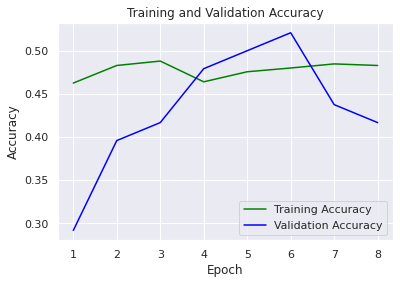

<Figure size 432x288 with 0 Axes>

In [47]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()


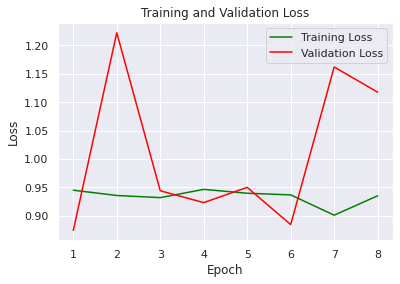

In [48]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

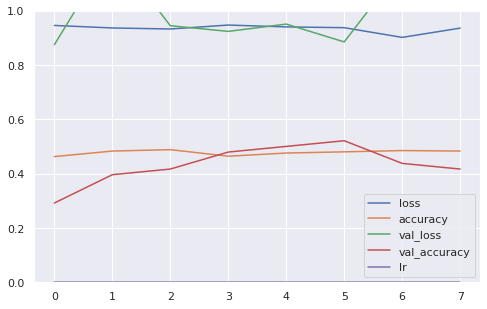

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 2.4 **Prediction**

In [50]:
predictions = classifier.predict(test)

# 2.5 **Accuracy**

In [51]:
print(classification_report(test.classes,predictions.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.40      1.00      0.57        79

    accuracy                           0.40       196
   macro avg       0.20      0.50      0.29       196
weighted avg       0.16      0.40      0.23       196



<AxesSubplot:>

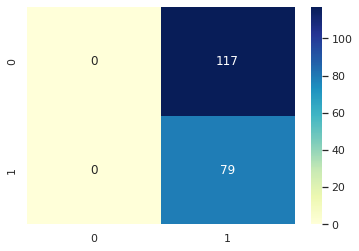

In [52]:
cm = confusion_matrix(test.classes, predictions.round())
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

# 3.0 use A single Image (Calssification And Segmentation)

# 3.1 **Read image**

In [53]:
image=plt.imread('../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif')

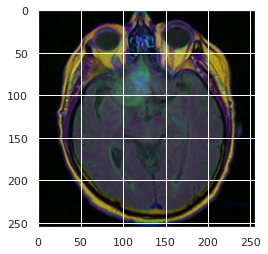

In [54]:
plt.imshow(image)
plt.show()

**Resize image and scalling**

In [55]:
image=cv2.resize(image,dsize=(Size))
image=image /255.0
image_ex=np.expand_dims(image,axis=0)

**Segmentation Predict**

In [56]:
pred=model.predict(image_ex)

**Classification predict**

In [57]:
prediction = classifier.predict(image_ex)

In [58]:
prediction.round()[0][0]

1.0

In [59]:
classes={0:'Not Tumor',1:'Tumor'}
print(classes[prediction.round()[0][0]])

Tumor


**Show Shape of predict segmentation**

In [60]:
pred.shape

(1, 256, 256, 1)

**Show Result**

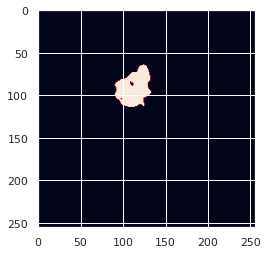

In [61]:
plt.imshow(np.squeeze(pred) > .5)

**Reshape image to do threshold**

In [62]:
p=np.reshape(pred,(256,256,1)) 
thresh=cv2.threshold(p,0.5,1,cv2.THRESH_BINARY)

In [63]:
thresh

(0.5,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [64]:
thresh=np.uint8(thresh[1])

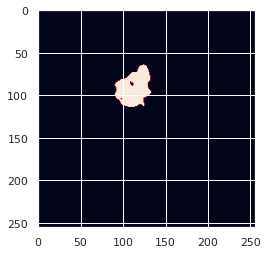

In [65]:
plt.imshow(thresh)

**Finding Contours To Draw**

In [66]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [67]:
len(contours)

3

In [68]:
contours

(array([[[123,  65]],
 
        [[122,  66]],
 
        [[120,  66]],
 
        [[118,  68]],
 
        [[118,  69]],
 
        [[117,  70]],
 
        [[117,  72]],
 
        [[115,  74]],
 
        [[110,  74]],
 
        [[103,  81]],
 
        [[102,  81]],
 
        [[101,  82]],
 
        [[ 97,  82]],
 
        [[ 95,  84]],
 
        [[ 94,  84]],
 
        [[ 92,  86]],
 
        [[ 91,  86]],
 
        [[ 91,  87]],
 
        [[ 90,  88]],
 
        [[ 90,  89]],
 
        [[ 91,  90]],
 
        [[ 91,  91]],
 
        [[ 92,  92]],
 
        [[ 92,  96]],
 
        [[ 91,  97]],
 
        [[ 91,  98]],
 
        [[ 90,  99]],
 
        [[ 90, 101]],
 
        [[ 91, 102]],
 
        [[ 91, 103]],
 
        [[ 93, 105]],
 
        [[ 94, 105]],
 
        [[ 96, 107]],
 
        [[ 96, 108]],
 
        [[ 97, 109]],
 
        [[ 97, 110]],
 
        [[ 99, 112]],
 
        [[101, 112]],
 
        [[102, 113]],
 
        [[104, 113]],
 
        [[105, 114]],
 
        [[113, 1

**Draw Contours**

In [69]:
img=image.copy()
cv2.drawContours(img,contours,0,(0,0,255),3)
x,y,w,h=cv2.boundingRect(contours[0])
img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)

In [70]:
img

array([[[0.        , 0.00392157, 0.00392157],
        [0.        , 0.00392157, 0.00392157],
        [0.        , 0.00784314, 0.00784314],
        ...,
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00784314],
        [0.        , 0.00784314, 0.01176471]],

       [[0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.01176471, 0.00784314],
        ...,
        [0.        , 0.01176471, 0.01568627],
        [0.        , 0.00392157, 0.01960784],
        [0.        , 0.00392157, 0.01176471]],

       [[0.        , 0.01176471, 0.01176471],
        [0.        , 0.01568627, 0.01176471],
        [0.        , 0.01568627, 0.00392157],
        ...,
        [0.        , 0.00392157, 0.00392157],
        [0.        , 0.00392157, 0.00392157],
        [0.        , 0.01176471, 0.00784314]],

       ...,

       [[0.        , 0.01176471, 0.00784314],
        [0.        , 0.01960784, 0.00392157],
        [0.        , 0

**Boundry Box**

In [71]:
x,y,w,h

(90, 65, 43, 50)

In [72]:
img.shape

(256, 256, 3)

# 4.0 **Final Result of This notebook**

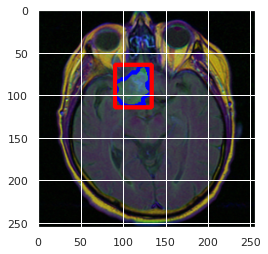

In [73]:
plt.imshow(img)

**Show Mask**

In [74]:
mas=plt.imread('../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif',0)

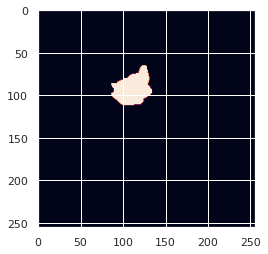

In [75]:
plt.imshow(mas)
plt.show()